In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pickle

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

import neurolib.dashboard.data as data
from neurolib.models.aln import ALNModel
import neurolib.dashboard.layout as layout
import neurolib.dashboard.functions as functions


# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

not here


In [2]:
readpath = os.getcwd().split(os.sep + 'data_2')[0]

with open(readpath + os.sep + 'bi.pickle','rb') as file:
    load_array= pickle.load(file)
ext_exc = load_array[0]
ext_inh = load_array[1]

cmap = layout.getcolormap()
darkgrey, midgrey, lightgrey, color_bi_updown, color_LC, color_bi_uposc = layout.getcolors()
exc_red = cmap(3)
inh_blue=cmap(0)
green = cmap(2)

aln = ALNModel()
data.set_parameters(aln)
state_vars = aln.state_vars

facecolor_ = '#EAEAEA'
facecolor_ = 'white'

folder = str(os.getcwd().split('data_2')[1])[1:]

In [3]:
ind0 = 20
dur = 500.

data.set_parameters(aln)

aln.params.ext_exc_current = ext_exc[ind0] * 5.
aln.params.ext_inh_current = ext_inh[ind0] * 5.
        
maxI = 3.          
aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = maxI)
aln.run(control=control0)

aln.params.duration = dur
target_1 = aln.getZeroTarget()
target_1[:,0,:] = aln.rates_exc[0,-1] 
target_1[:,1,:] = aln.rates_inh[0,-1]

aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = -maxI)
aln.run(control=control0)
        
maxI = -3.          
aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = maxI)
aln.run(control=control0)

aln.params.duration = dur
target_3 = aln.getZeroTarget()
target_3[:,0,:] = aln.rates_exc[0,-1] 
target_3[:,1,:] = aln.rates_inh[0,-1]

aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = -maxI)
aln.run(control=control0)

aln.params.ext_exc_current = ext_exc[50] * 5.
aln.params.ext_inh_current = ext_inh[50] * 5.
        
maxI = 3.          
aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = maxI)
aln.run(control=control0)

aln.params.duration = dur
target_1b = aln.getZeroTarget()
target_1b[:,0,:] = aln.rates_exc[0,-1] 
target_1b[:,1,:] = aln.rates_inh[0,-1]

aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = -maxI)
aln.run(control=control0)
        
maxI = -3.          
aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = maxI)
aln.run(control=control0)

aln.params.duration = dur
target_3b = aln.getZeroTarget()
target_3b[:,0,:] = aln.rates_exc[0,-1] 
target_3b[:,1,:] = aln.rates_inh[0,-1]

In [4]:
def readcase(readpath, i):

    with open(readpath,'rb') as f:
        load_array = pickle.load(f)

    bestControl_ = load_array[0][i]
    bestState_ = load_array[1][i]
    cost_ = load_array[2][i]
    costnode_ = load_array[3][i]
    weights_ = load_array[4][i]
        
    return bestControl_, bestState_, costnode_, weights_

In [5]:
savepath = os.path.join(os.getcwd().split('neurolib')[0], 'writing' + os.sep + 'paper1' + os.sep 
                        + 'Frontiers' + os.sep + 'images')
cols = [r'down $\rightarrow$ up, $L^1$, point a', r'down $\rightarrow$ up, $L^1$, point b',
        r'down $\rightarrow$ up, $L^2$, point a', r'down $\rightarrow$ up, $L^2$, point b',
        r'up $\rightarrow$ down, $L^1$, point a', r'up $\rightarrow$ down, $L^1$, point b',
        r'up $\rightarrow$ down, $L^2$, point a', r'up $\rightarrow$ down, $L^2$, point b'
       ] 

In [6]:
def plot_control_current(model, control_array, state_array, weight_array,
                         target_, title, costnode_array, y_lim, y_ticks, x_ticks,
                         path_=savepath, filename_=''):
    
    dt = model.params.dt
    control_factor = model.params.C/1000.
    output_vars = model.output_vars
    
    n_subfigs = len(control_array)
    columns = len(control_array[0])
    rows = 2
    
    fig = plt.figure(figsize=(columns*5, n_subfigs*5), constrained_layout=True)
    subfigs = fig.subfigures(n_subfigs, 1)
    
    linewidth_ = 3    
    fontsize_ = 18
    
    fig.text(0., 1., 'A', horizontalalignment='left', verticalalignment='top', fontsize=fontsize_, weight='bold')
    fig.text(0., 0.75, 'B', horizontalalignment='left', verticalalignment='top', fontsize=fontsize_, weight='bold')
    fig.text(0., 0.5, 'C', horizontalalignment='left', verticalalignment='top', fontsize=fontsize_, weight='bold')
    fig.text(0., 0.25, 'D', horizontalalignment='left', verticalalignment='top', fontsize=fontsize_, weight='bold')
    
    props = dict(boxstyle='round', facecolor='grey', alpha=0.2)

    for i in range(n_subfigs):
            
        ax = subfigs[i].subplots(rows, columns)
        
        ##################### go through all controls in control array 
        
        for j in range(columns):
                        
            control_ = control_array[i][j]
            state_ = state_array[i][j]
            costnode_ = costnode_array[i][j]
            dur = (control_.shape[2] - 201.) * dt
            T = control_.shape[2] - 200
            weight = weight_array[i][j]
            
            time_ = np.arange(0., round(dur + dt, 1), dt)
            
            if 'Wmax' in filename_:
                ax[0,j].set_title('$T = ${:.1f}'.format(dur) + ' ms' + r'$W_1 = ${:.2f}'.format(weight),
                                       fontsize=fontsize_)
            else:
                ax[0,j].set_title('$T = ${:.1f}'.format(dur) + ' ms',
                                       fontsize=fontsize_)
            
            ax[0,j].plot(time_, target_[0,0,:T], '--', linewidth = 3, color=exc_red)
            ax[0,j].plot(time_, target_[0,1,:T], '--', linewidth = 3, color=inh_blue)
            
            ax[0,j].plot(time_, state_[0,0,100:-100], linewidth=linewidth_, color=exc_red)
            ax[0,j].plot(time_, state_[0,1,100:-100], linewidth=linewidth_, color=inh_blue)                     
            ax[1,j].plot(time_, control_[0,0,100:-100] * control_factor, linewidth=linewidth_, color=exc_red)
            ax[1,j].plot(time_, control_[0,1,100:-100] * control_factor, linewidth=linewidth_, color=inh_blue)                
                
            ax[0,j].axvspan( dur - 20., dur+1., facecolor='grey', alpha=0.2, zorder=-1, hatch='///', edgecolor = 'grey')

            ax[0,j].set_xticks([])
            ax[0,j].get_xaxis().set_visible(False)
            ax[1,j].set_xlabel('t [ms]', fontsize=fontsize_) 
            ax[0,j].set_yticks(np.arange(0., 105., 25.))
            if j != 0:
                ax[0,j].set_yticks([])
            ax[0,j].set_ylim([-5., 120.])
            
            ax[1,j].set_yticks(y_ticks[i][j])
            ax[1,j].set_ylim(y_lim[i][j])
            ax[1,j].set_xticks(x_ticks[i][j])
            
            
            if np.abs(costnode_[2][0][0]) < 1e-12:
                costnode_[2][0][0] = 0.
            if np.abs(costnode_[2][0][1]) < 1e-12:
                costnode_[2][0][1] = 0.
            
            textstr = str( r'$F_P = $' + '{:#.4g}'.format(costnode_[0][0][0])
                        + '\n' + r'$F_{1,E} =$' + '{:#.4g}'.format(costnode_[2][0][0]) 
                        + '\n' + r'$F_{1,I} =$' + '{:#.4g}'.format(costnode_[2][0][1])
                         )
            
            ax[0,j].text(0.05, 0.9, textstr, transform=ax[0,j].transAxes, fontsize=fontsize_,
            verticalalignment='top', horizontalalignment='left', bbox=props)

            for l in range(rows):
                ax[l,j].tick_params(axis='x', labelsize=fontsize_)
                ax[l,j].tick_params(axis='y', labelsize=fontsize_)
                ax[l,j].set_xlim([0., dur])
                ax[l,j].grid(False)

            ax[0,0].set_ylabel('Rates [Hz]', fontsize=fontsize_)      
            ax[1,0].set_ylabel('Control [nA]', fontsize=fontsize_)  

    fig.suptitle(title, fontsize=fontsize_, y=1.03)
        
    plt.savefig(os.path.join(path_, filename_), bbox_inches='tight', facecolor=fig.get_facecolor(),
                edgecolor='none', dpi=300)

In [7]:
i = 20
target_array = target_1

In [10]:
readpath = str(folder + '.pickle')
opt_control, opt_state, costnode_, weights_ = readcase(readpath,0)
for j in range(len(opt_control)):
    if type(opt_control[j]) != type(None):
        print(j)
        if type(weights_[j]) == type(None):
            weights_[j] = [1., 0., 1.]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

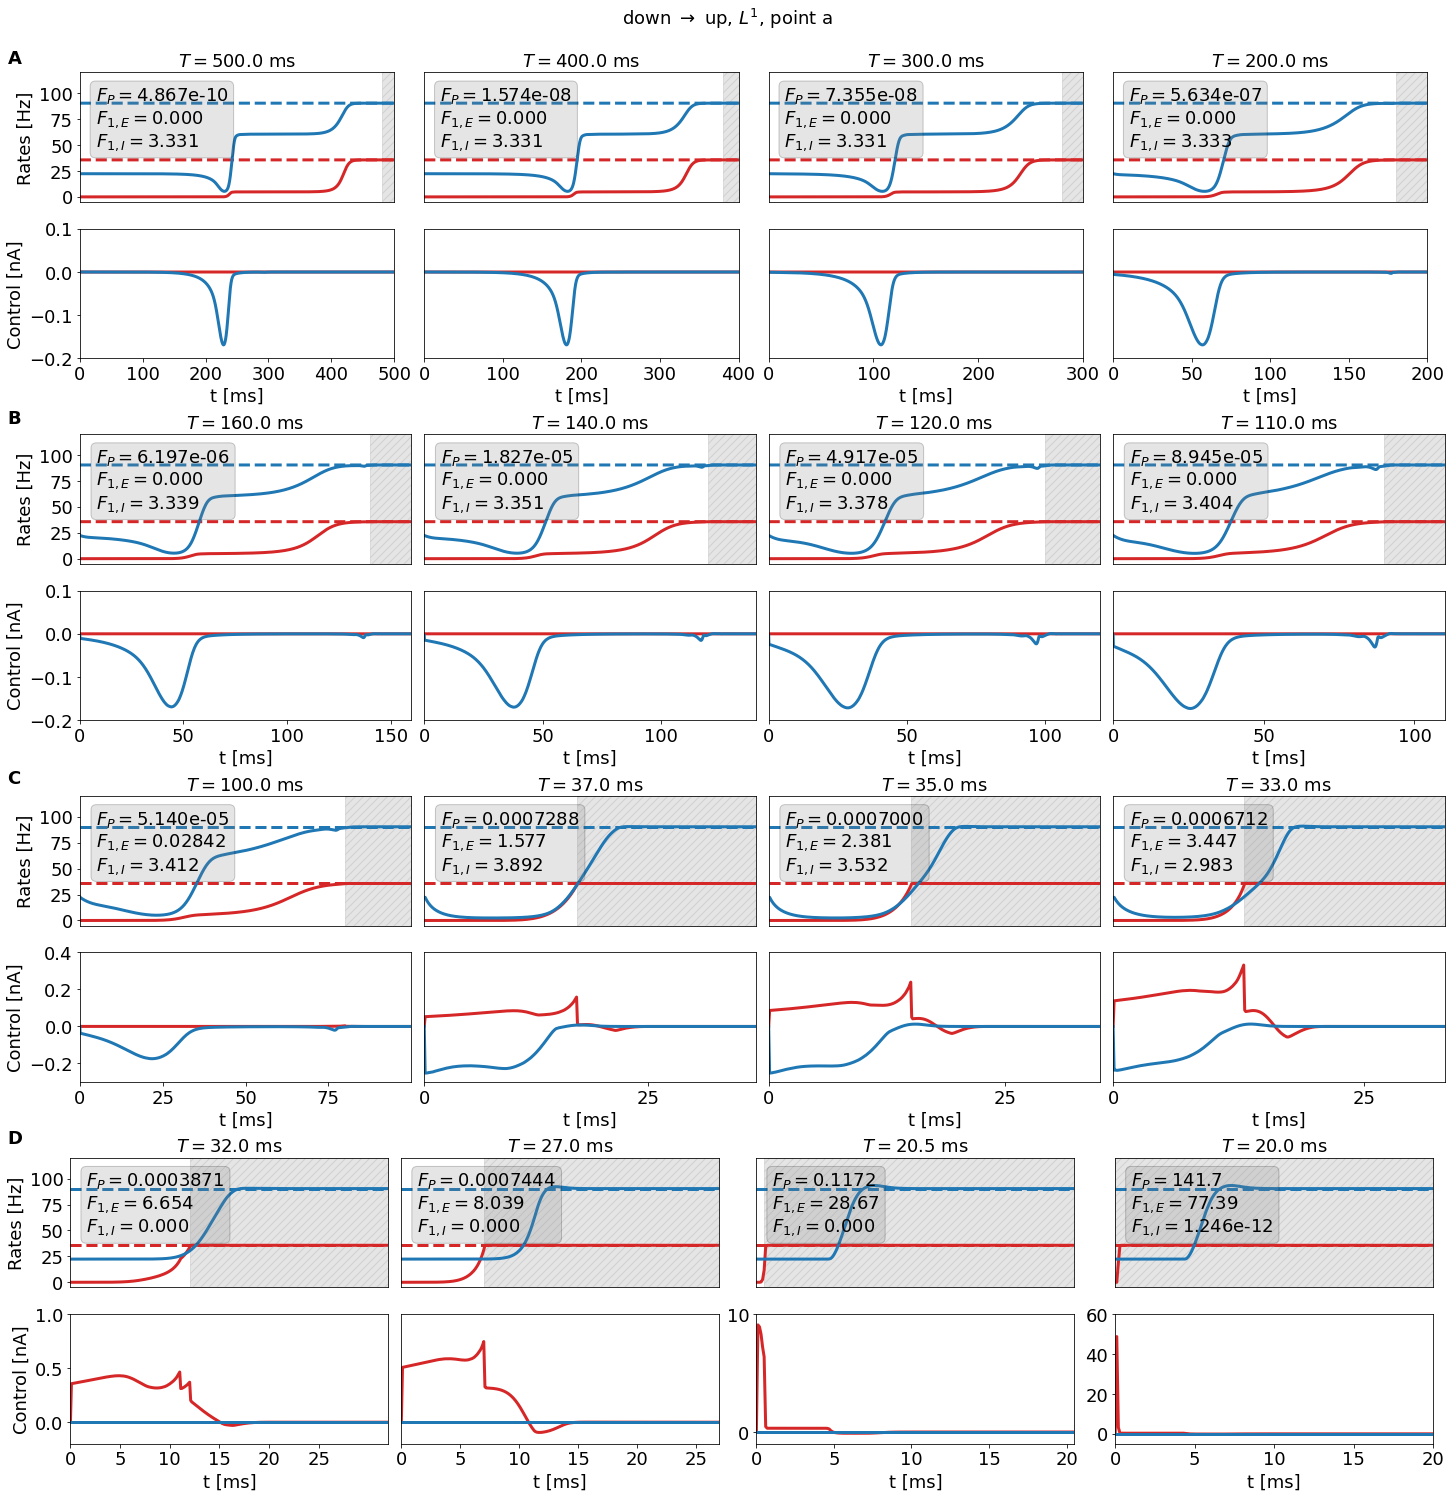

In [21]:
index_ = [ [0, 1000, 2000, 3000], 
          [3400, 3600, 3800, 3900],
          [4000, 4630, 4650, 4670],
          [4680, 4730, 4795, 4800] ]

y_lim = [ [[-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1] ],
          [[-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1] ],
          [[-0.3, 0.4], [-0.3, 0.4], [-.3, 0.4], [-.3, 0.4] ],
          [[-.2, 1.], [-.2, 1.], [-1., 10.], [-5., 60.] ]
        ]
y_ticks = [ [[-0.2, -0.1, 0., 0.1], [], [], [] ],
            [[-0.2, -0.1, 0., 0.1], [], [], [] ],
            [[-0.2, 0., 0.2, 0.4], [], [], [] ],
            [[0., 0.5, 1.], [], [0., 10., 20.], [0., 20., 40., 60.]],
        ]
x_ticks = [ [np.arange(0., 501., 100.), np.arange(0., 501., 100.), np.arange(0., 501., 100.),
               np.arange(0., 300., 50.), np.arange(0., 200., 20.)],
            [np.arange(0., 300., 50.), np.arange(0., 300., 50.), np.arange(0., 300., 50.),
               np.arange(0., 300., 50.), np.arange(0., 300., 50.)],
            [np.arange(0., 100., 25.), np.arange(0., 100., 25.), np.arange(0., 100., 25.),
               np.arange(0., 100., 25.), np.arange(0., 100., 25.)],
            [np.arange(0., 30., 5.), np.arange(0., 30., 5.), np.arange(0., 30., 5.),
               np.arange(0., 30., 5.), np.arange(0., 30., 5.)]
          ]

cntrl_array = [ [opt_control[index_[0][0]], opt_control[index_[0][1]], opt_control[index_[0][2]],
                 opt_control[index_[0][3]] ],
                [opt_control[index_[1][0]], opt_control[index_[1][1]], opt_control[index_[1][2]],
                 opt_control[index_[1][3]] ],
                [opt_control[index_[2][0]], opt_control[index_[2][1]], opt_control[index_[2][2]],
                 opt_control[index_[2][3]] ],
                [opt_control[index_[3][0]], opt_control[index_[3][1]], opt_control[index_[3][2]],
                 opt_control[index_[3][3]] ]
                ]

state_array = [ [ opt_state[index_[0][0]], opt_state[index_[0][1]], opt_state[index_[0][2]],
                 opt_state[index_[0][3]] ],
                [ opt_state[index_[1][0]], opt_state[index_[1][1]], opt_state[index_[1][2]],
                 opt_state[index_[1][3]] ],
                [ opt_state[index_[2][0]], opt_state[index_[2][1]], opt_state[index_[2][2]],
                 opt_state[index_[2][3]] ],
               [ opt_state[index_[3][0]], opt_state[index_[3][1]], opt_state[index_[3][2]],
                 opt_state[index_[3][3]] ]
                ]

cost_array = [  [costnode_[index_[0][0]], costnode_[index_[0][1]], costnode_[index_[0][2]],
                 costnode_[index_[0][3]] ],
                [costnode_[index_[1][0]], costnode_[index_[1][1]], costnode_[index_[1][2]],
                 costnode_[index_[1][3]] ],
                [costnode_[index_[2][0]], costnode_[index_[2][1]], costnode_[index_[2][2]],
                 costnode_[index_[2][3]] ],
                [costnode_[index_[3][0]], costnode_[index_[3][1]], costnode_[index_[3][2]],
                 costnode_[index_[3][3]] ]
                ]

weight_array = [  [weights_[index_[0][0]][2], weights_[index_[0][1]][2], weights_[index_[0][2]][2],
                 weights_[index_[0][3]][2] ],
                [weights_[index_[1][0]][2], weights_[index_[1][1]][2], weights_[index_[1][2]][2],
                 weights_[index_[1][3]][2] ],
                [weights_[index_[2][0]][2], weights_[index_[2][1]][2], weights_[index_[2][2]][2],
                 weights_[index_[2][3]][2] ],
                [weights_[index_[3][0]][2], weights_[index_[3][1]][2], weights_[index_[3][2]][2],
                 weights_[index_[3][3]][2] ]
                ]


plot_control_current(aln, cntrl_array, state_array, weight_array, target_1, cols[0], cost_array,
                     y_lim, y_ticks, x_ticks, filename_=folder + '_' + str(i) + '.jpg')
plt.show()

In [22]:
readpath = str(folder + '_Wmax.pickle')
opt_control, opt_state, costnode_, weights_ = readcase(readpath,0)
for j in range(len(opt_control)):
    if type(opt_control[j]) != type(None):
        print(j)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
31

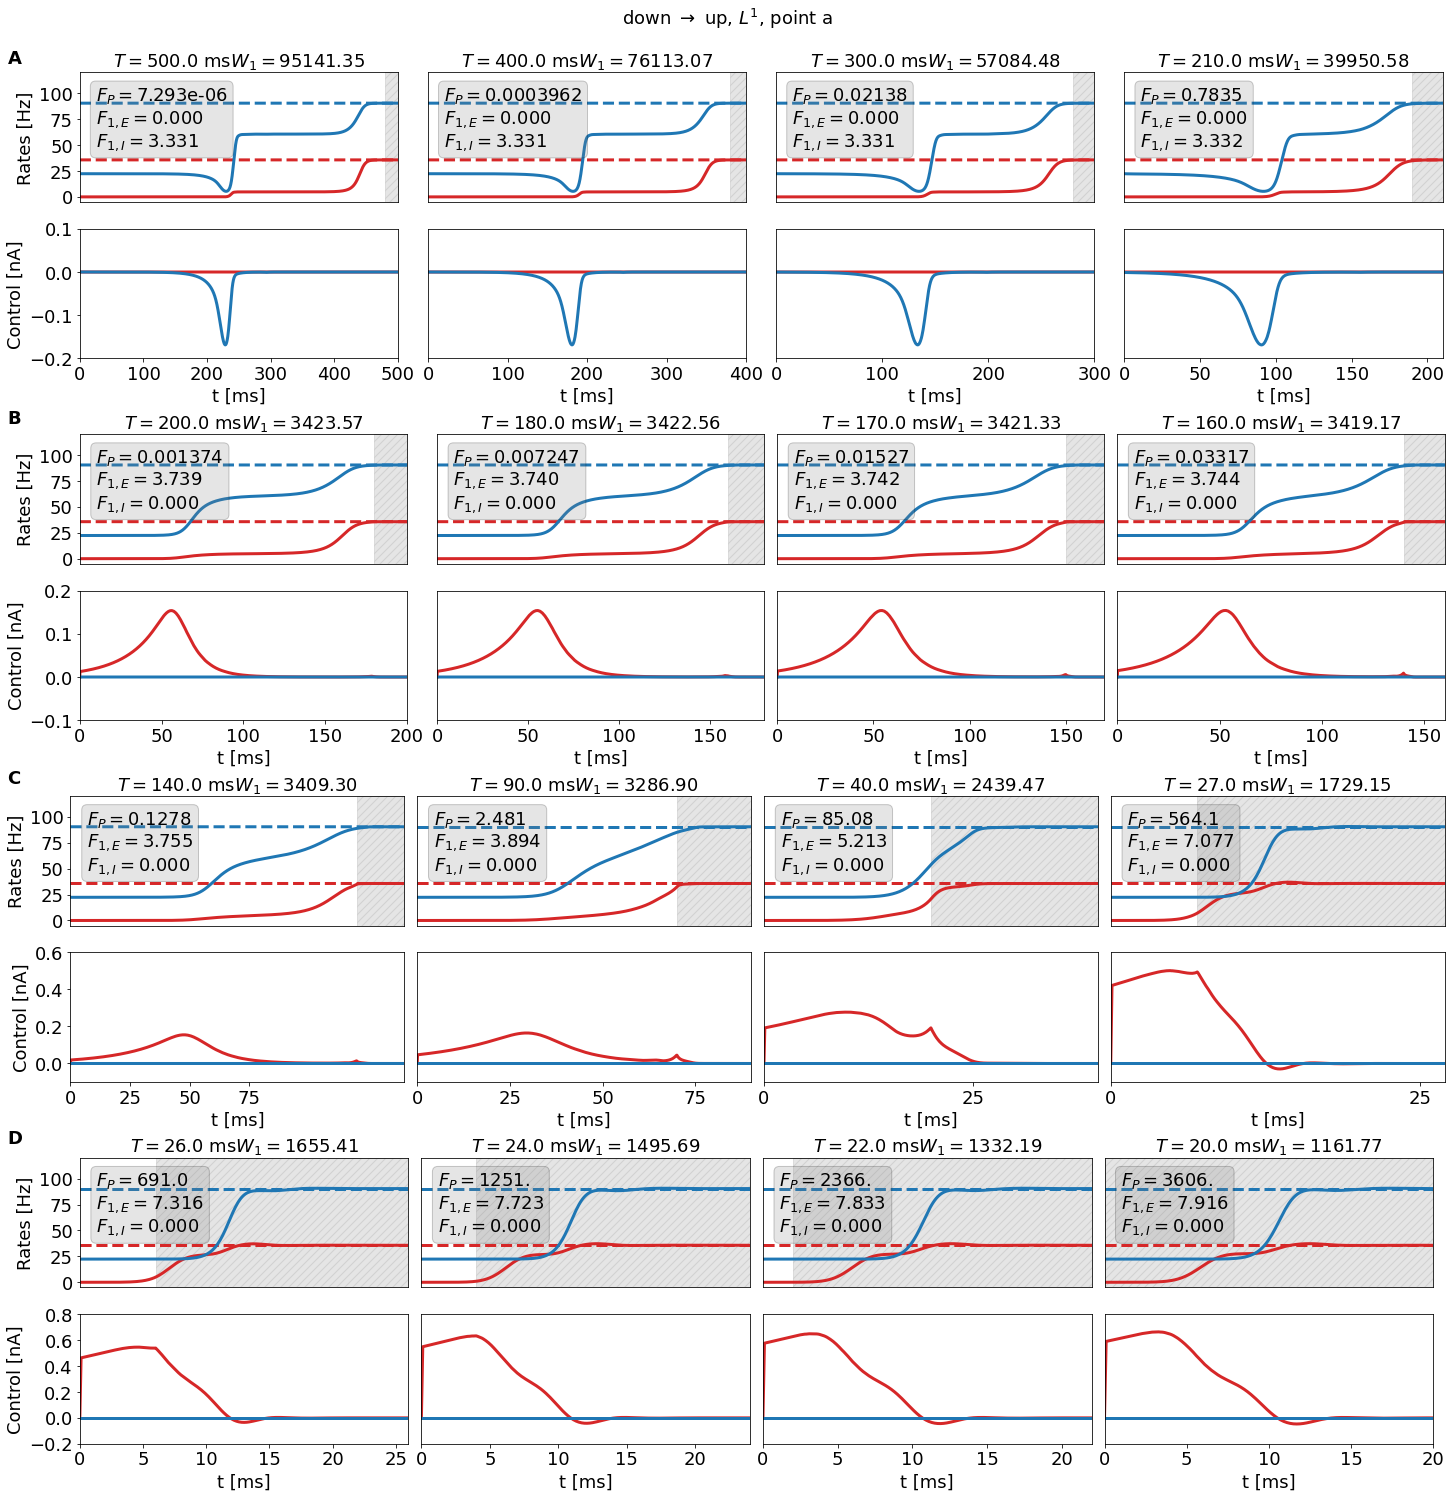

In [23]:
index_ = [ [0, 1000, 2000, 2900], 
          [3000, 3200, 3300, 3400],
          [3600, 4100, 4600, 4730],
          [4740, 4760, 4780, 4800] ]

y_lim = [ [[-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1] ],
          [[-0.1, 0.2], [-0.1, 0.2], [-0.1, 0.2], [-0.1, 0.2] ],
          [[-0.1, 0.6], [-0.1, 0.6], [-0.1, 0.6], [-0.1, 0.6] ],
          [[-0.2, 0.8], [-0.2, 0.8], [-0.2, 0.8], [-0.2, 0.8] ]
        ]
y_ticks = [ [[-0.2, -0.1, 0., 0.1], [], [], [] ],
            [[-0.1, 0., 0.1, 0.2], [], [], [] ],
            [[-0.2, 0., 0.2, 0.4, 0.6], [], [], [] ],
            [[-0.2, 0., 0.2, 0.4, 0.6, 0.8], [], [], [] ],
        ]
x_ticks = [ [np.arange(0., 501., 100.), np.arange(0., 501., 100.), np.arange(0., 501., 100.),
               np.arange(0., 300., 50.), np.arange(0., 200., 20.)],
            [np.arange(0., 300., 50.), np.arange(0., 300., 50.), np.arange(0., 300., 50.),
               np.arange(0., 300., 50.), np.arange(0., 300., 50.)],
            [np.arange(0., 100., 25.), np.arange(0., 100., 25.), np.arange(0., 100., 25.),
               np.arange(0., 100., 25.), np.arange(0., 100., 25.)],
            [np.arange(0., 30., 5.), np.arange(0., 30., 5.), np.arange(0., 30., 5.),
               np.arange(0., 30., 5.), np.arange(0., 30., 5.)]
          ]

cntrl_array = [ [opt_control[index_[0][0]], opt_control[index_[0][1]], opt_control[index_[0][2]],
                 opt_control[index_[0][3]] ],
                [opt_control[index_[1][0]], opt_control[index_[1][1]], opt_control[index_[1][2]],
                 opt_control[index_[1][3]] ],
                [opt_control[index_[2][0]], opt_control[index_[2][1]], opt_control[index_[2][2]],
                 opt_control[index_[2][3]] ],
                [opt_control[index_[3][0]], opt_control[index_[3][1]], opt_control[index_[3][2]],
                 opt_control[index_[3][3]] ]
                ]

state_array = [ [ opt_state[index_[0][0]], opt_state[index_[0][1]], opt_state[index_[0][2]],
                 opt_state[index_[0][3]] ],
                [ opt_state[index_[1][0]], opt_state[index_[1][1]], opt_state[index_[1][2]],
                 opt_state[index_[1][3]] ],
                [ opt_state[index_[2][0]], opt_state[index_[2][1]], opt_state[index_[2][2]],
                 opt_state[index_[2][3]] ],
               [ opt_state[index_[3][0]], opt_state[index_[3][1]], opt_state[index_[3][2]],
                 opt_state[index_[3][3]] ]
                ]

cost_array = [  [costnode_[index_[0][0]], costnode_[index_[0][1]], costnode_[index_[0][2]],
                 costnode_[index_[0][3]] ],
                [costnode_[index_[1][0]], costnode_[index_[1][1]], costnode_[index_[1][2]],
                 costnode_[index_[1][3]] ],
                [costnode_[index_[2][0]], costnode_[index_[2][1]], costnode_[index_[2][2]],
                 costnode_[index_[2][3]] ],
                [costnode_[index_[3][0]], costnode_[index_[3][1]], costnode_[index_[3][2]],
                 costnode_[index_[3][3]] ]
                ]

weight_array = [  [weights_[index_[0][0]][2], weights_[index_[0][1]][2], weights_[index_[0][2]][2],
                 weights_[index_[0][3]][2] ],
                [weights_[index_[1][0]][2], weights_[index_[1][1]][2], weights_[index_[1][2]][2],
                 weights_[index_[1][3]][2] ],
                [weights_[index_[2][0]][2], weights_[index_[2][1]][2], weights_[index_[2][2]][2],
                 weights_[index_[2][3]][2] ],
                [weights_[index_[3][0]][2], weights_[index_[3][1]][2], weights_[index_[3][2]][2],
                 weights_[index_[3][3]][2] ]
                ]


plot_control_current(aln, cntrl_array, state_array, weight_array, target_1, cols[0], cost_array,
                     y_lim, y_ticks, x_ticks, filename_=folder + '_' + str(i) + '_Wmax.jpg')
plt.show()

In [51]:
i = 50
target_array = target_1b

In [52]:
readpath = str(folder + '.pickle')
opt_control, opt_state, costnode_, weights_ = readcase(readpath,1)
for j in range(len(opt_control)):
    if type(opt_control[j]) != type(None):
        print(j)

0
19
4800


In [35]:
index_ = [ [0, 1000, 2000, 3000], 
          [3400, 3600, 3800, 3900],
          [4000, 4600, 4630, 4640],
          [4780, 4790, 4795, 4800] ]

y_lim = [ [[-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1] ],
          [[-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1] ],
          [[-0.3, 0.5], [-0.3, 0.5], [-0.3, 0.5], [-0.3, 0.5] ],
          [[-2., 10.], [-2, 10.], [-10., 20.], [-10., 50.] ]
        ]
y_ticks = [ [[-0.2, -0.1, 0., 0.1], [], [], [] ],
            [[-0.2, -0.1, 0., 0.1], [], [], [] ],
            [[-0.2, 0., 0.2, 0.4], [], [], [] ],
            [[-0.2, 0., 0.2, 0.4], [], [0., 10., 20.], [0., 20., 40., 50.]],
        ]
x_ticks = [ [np.arange(0., 501., 100.), np.arange(0., 501., 100.), np.arange(0., 501., 100.),
               np.arange(0., 300., 50.), np.arange(0., 200., 20.)],
            [np.arange(0., 300., 50.), np.arange(0., 300., 50.), np.arange(0., 300., 50.),
               np.arange(0., 300., 50.), np.arange(0., 300., 50.)],
            [np.arange(0., 100., 25.), np.arange(0., 100., 25.), np.arange(0., 100., 25.),
               np.arange(0., 100., 25.), np.arange(0., 100., 25.)],
            [np.arange(0., 30., 5.), np.arange(0., 30., 5.), np.arange(0., 30., 5.),
               np.arange(0., 30., 5.), np.arange(0., 30., 5.)]
          ]

cntrl_array = [ [opt_control[index_[0][0]], opt_control[index_[0][1]], opt_control[index_[0][2]],
                 opt_control[index_[0][3]] ],
                [opt_control[index_[1][0]], opt_control[index_[1][1]], opt_control[index_[1][2]],
                 opt_control[index_[1][3]] ],
                [opt_control[index_[2][0]], opt_control[index_[2][1]], opt_control[index_[2][2]],
                 opt_control[index_[2][3]] ],
                [opt_control[index_[3][0]], opt_control[index_[3][1]], opt_control[index_[3][2]],
                 opt_control[index_[3][3]] ]
                ]

state_array = [ [ opt_state[index_[0][0]], opt_state[index_[0][1]], opt_state[index_[0][2]],
                 opt_state[index_[0][3]] ],
                [ opt_state[index_[1][0]], opt_state[index_[1][1]], opt_state[index_[1][2]],
                 opt_state[index_[1][3]] ],
                [ opt_state[index_[2][0]], opt_state[index_[2][1]], opt_state[index_[2][2]],
                 opt_state[index_[2][3]] ],
               [ opt_state[index_[3][0]], opt_state[index_[3][1]], opt_state[index_[3][2]],
                 opt_state[index_[3][3]] ]
                ]

cost_array = [  [costnode_[index_[0][0]], costnode_[index_[0][1]], costnode_[index_[0][2]],
                 costnode_[index_[0][3]] ],
                [costnode_[index_[1][0]], costnode_[index_[1][1]], costnode_[index_[1][2]],
                 costnode_[index_[1][3]] ],
                [costnode_[index_[2][0]], costnode_[index_[2][1]], costnode_[index_[2][2]],
                 costnode_[index_[2][3]] ],
                [costnode_[index_[3][0]], costnode_[index_[3][1]], costnode_[index_[3][2]],
                 costnode_[index_[3][3]] ]
                ]

weight_array = [  [weights_[index_[0][0]][2], weights_[index_[0][1]][2], weights_[index_[0][2]][2],
                 weights_[index_[0][3]][2] ],
                [weights_[index_[1][0]][2], weights_[index_[1][1]][2], weights_[index_[1][2]][2],
                 weights_[index_[1][3]][2] ],
                [weights_[index_[2][0]][2], weights_[index_[2][1]][2], weights_[index_[2][2]][2],
                 weights_[index_[2][3]][2] ],
                [weights_[index_[3][0]][2], weights_[index_[3][1]][2], weights_[index_[3][2]][2],
                 weights_[index_[3][3]][2] ]
                ]


plot_control_current(aln, cntrl_array, state_array, weight_array, target_1, cols[0], cost_array,
                     y_lim, y_ticks, x_ticks, filename_=folder + '_' + str(i) + '.jpg')
plt.show()

TypeError: 'NoneType' object is not subscriptable

In [34]:
readpath = str(folder + '_Wmax.pickle')
opt_control, opt_state, costnode_, weights_ = readcase(readpath,1)
for j in range(len(opt_control)):
    if type(opt_control[j]) != type(None):
        print(j)

In [ ]:
index_ = [ [0, 1000, 2000, 2900], 
          [3000, 3200, 3300, 3400],
          [3600, 4100, 4600, 4730],
          [4740, 4760, 4780, 4800] ]

y_lim = [ [[-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1] ],
          [[-0.1, 0.2], [-0.1, 0.2], [-0.1, 0.2], [-0.1, 0.2] ],
          [[-0.1, 0.6], [-0.1, 0.6], [-0.1, 0.6], [-0.1, 0.6] ],
          [[-0.2, 0.8], [-0.2, 0.8], [-0.2, 0.8], [-0.2, 0.8] ]
        ]
y_ticks = [ [[-0.2, -0.1, 0., 0.1], [], [], [] ],
            [[-0.1, 0., 0.1, 0.2], [], [], [] ],
            [[-0.2, 0., 0.2, 0.4, 0.6], [], [], [] ],
            [[-0.2, 0., 0.2, 0.4, 0.6, 0.8], [], [], [] ],
        ]
x_ticks = [ [np.arange(0., 501., 100.), np.arange(0., 501., 100.), np.arange(0., 501., 100.),
               np.arange(0., 300., 50.), np.arange(0., 200., 20.)],
            [np.arange(0., 300., 50.), np.arange(0., 300., 50.), np.arange(0., 300., 50.),
               np.arange(0., 300., 50.), np.arange(0., 300., 50.)],
            [np.arange(0., 100., 25.), np.arange(0., 100., 25.), np.arange(0., 100., 25.),
               np.arange(0., 100., 25.), np.arange(0., 100., 25.)],
            [np.arange(0., 30., 5.), np.arange(0., 30., 5.), np.arange(0., 30., 5.),
               np.arange(0., 30., 5.), np.arange(0., 30., 5.)]
          ]

cntrl_array = [ [opt_control[index_[0][0]], opt_control[index_[0][1]], opt_control[index_[0][2]],
                 opt_control[index_[0][3]] ],
                [opt_control[index_[1][0]], opt_control[index_[1][1]], opt_control[index_[1][2]],
                 opt_control[index_[1][3]] ],
                [opt_control[index_[2][0]], opt_control[index_[2][1]], opt_control[index_[2][2]],
                 opt_control[index_[2][3]] ],
                [opt_control[index_[3][0]], opt_control[index_[3][1]], opt_control[index_[3][2]],
                 opt_control[index_[3][3]] ]
                ]

state_array = [ [ opt_state[index_[0][0]], opt_state[index_[0][1]], opt_state[index_[0][2]],
                 opt_state[index_[0][3]] ],
                [ opt_state[index_[1][0]], opt_state[index_[1][1]], opt_state[index_[1][2]],
                 opt_state[index_[1][3]] ],
                [ opt_state[index_[2][0]], opt_state[index_[2][1]], opt_state[index_[2][2]],
                 opt_state[index_[2][3]] ],
               [ opt_state[index_[3][0]], opt_state[index_[3][1]], opt_state[index_[3][2]],
                 opt_state[index_[3][3]] ]
                ]

cost_array = [  [costnode_[index_[0][0]], costnode_[index_[0][1]], costnode_[index_[0][2]],
                 costnode_[index_[0][3]] ],
                [costnode_[index_[1][0]], costnode_[index_[1][1]], costnode_[index_[1][2]],
                 costnode_[index_[1][3]] ],
                [costnode_[index_[2][0]], costnode_[index_[2][1]], costnode_[index_[2][2]],
                 costnode_[index_[2][3]] ],
                [costnode_[index_[3][0]], costnode_[index_[3][1]], costnode_[index_[3][2]],
                 costnode_[index_[3][3]] ]
                ]

weight_array = [  [weights_[index_[0][0]][2], weights_[index_[0][1]][2], weights_[index_[0][2]][2],
                 weights_[index_[0][3]][2] ],
                [weights_[index_[1][0]][2], weights_[index_[1][1]][2], weights_[index_[1][2]][2],
                 weights_[index_[1][3]][2] ],
                [weights_[index_[2][0]][2], weights_[index_[2][1]][2], weights_[index_[2][2]][2],
                 weights_[index_[2][3]][2] ],
                [weights_[index_[3][0]][2], weights_[index_[3][1]][2], weights_[index_[3][2]][2],
                 weights_[index_[3][3]][2] ]
                ]


plot_control_current(aln, cntrl_array, state_array, weight_array, target_1, cols[0], cost_array,
                     y_lim, y_ticks, x_ticks, filename_=folder + '_' + str(i) + '_Wmax.jpg')
plt.show()